# Fake News Detector
This is a fake news detector using this guide: [Fake News Detection in Python](https://thepythoncode.com/article/fake-news-classification-in-python)

The dataset used here and from the guide is this [Kaggle Notebook](https://www.kaggle.com/c/fake-news/data?select=train.csv)

In [1]:
# !pip install --upgrade pip
# !pip install transformers==4.21

# *** UNCOMMENT AND RUN THIS TO PREVENT ERRORS LATER ***
# *** RUN ONCE AND RESTART ENVIRONMENT (in runtime tab) THEN RUN THE REST ***

In [1]:
# For Analysis

# Dataset/Dataset operations
import pandas as pd

# Perform array operations. They're usually quicker than traditional Python array operations
import numpy as np

# Both for visualization. MPL creates nicer looking visualizers but seaborn might be a little
# easier + can generate more informative visualizers like heatmaps
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK library for NLP
import nltk

# Comment the next two lines, i did this because I moved stuff to different drives
# nltk.data.path = []
# nltk.data.path.append("F:/nltk_data")
nltk.download('stopwords')
nltk.download('wordnet')

# Put dataset in pandas dataframe
path = "train.csv"
news = pd.read_csv(path)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hanli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hanli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# read the test set
test_df = pd.read_csv("test.csv")

In [3]:
# For cleaning the dataset

# Library for NLP
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

In [4]:
# Get some info on the df and print the first few entries
print("Shape of News data:", news.shape)
print("News data columns", news.columns)
news.head()

Shape of News data: (20800, 5)
News data columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
# Text Word stats

txt_length = news.text.str.split().str.len()
txt_length.describe()

count    20761.000000
mean       760.308126
std        869.525988
min          0.000000
25%        269.000000
50%        556.000000
75%       1052.000000
max      24234.000000
Name: text, dtype: float64

In [6]:
# Title statistics

title_length = news.title.str.split().str.len()
title_length.describe()

count    20242.000000
mean        12.420709
std          4.098735
min          1.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         72.000000
Name: title, dtype: float64

0: Reliable
1: Unreliable
Distribution of labels:
label
1    10413
0    10387
Name: count, dtype: int64
label
1    50.0
0    50.0
Name: proportion, dtype: float64


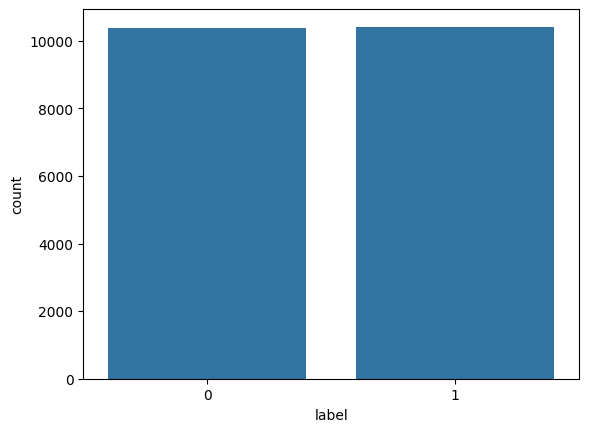

In [7]:
# We want to visualize some data now.
# This dataset has articles labeled both reliable/unreliable.
# Graphing the data shows this is a balanced dataset.

sns.countplot(x="label", data=news);
print("0: Reliable")
print("1: Unreliable")
print("Distribution of labels:")
print(news.label.value_counts());

# Also reinforces that this is balanced
print(round(news.label.value_counts(normalize=True), 2) * 100);

# **Data Cleaning for Analysis**
### Datasets often have unuseful data that won't help our model. Getting rid of this data ensures that our model has the highest level of accuracy.

In [8]:
# Constants that are used to sanitize the datasets

column_n = ['id', 'title', 'author', 'text', 'label']
remove_c = ['id','author']
categorical_features = []
target_col = ['label']
text_f = ['title', 'text']

In [9]:
# Cleaning time!!!

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

# Removed unused columns
def remove_unused_c(df,column_n=remove_c):
    df = df.drop(column_n,axis=1)
    return df

# Impute null values with None
def null_process(feature_df):
    for col in text_f:
        feature_df.loc[feature_df[col].isnull(), col] = "None"
    return feature_df

def clean_dataset(df):
    # remove unused column
    df = remove_unused_c(df)
    #impute null values
    df = null_process(df)
    return df

# Cleaning text from unused characters
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    #text = ' '.join(text)
    return text

## Nltk Preprocessing include:
# Stop words, Stemming and Lemmetization
# For our project we use only Stop word removal
def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    #text = ' '.join([word for word in wordlist if word not in stopwords_dict])
    #text = [ps.stem(word) for word in wordlist if not word in stopwords_dict]
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text

In [10]:
# Perform data cleaning on train and test dataset by calling clean_dataset function
df = clean_dataset(news)
# apply preprocessing on text through apply method by calling the function nltk_preprocess
df["text"] = df.text.apply(nltk_preprocess)
# apply preprocessing on title through apply method by calling the function nltk_preprocess
df["title"] = df.title.apply(nltk_preprocess)

# Do the same thing for the test.csv set
df2 = clean_dataset(test_df)
# apply preprocessing on text through apply method by calling the function nltk_preprocess
df2["text"] = test_df.text.apply(nltk_preprocess)
# apply preprocessing on title through apply method by calling the function nltk_preprocess
df2["title"] = test_df.title.apply(nltk_preprocess)

In [11]:
df.head()

,title,text,label
0,house dem aide didnt even see comeys letter ja...,house dem aide didnt even see comeys letter ja...,1
1,flynn hillary clinton big woman campus breitbart,ever get feeling life circle roundabout rather...,0
2,truth might get fired,truth might get fired october 29 2016 tension ...,1
3,15 civilian killed single u airstrike identified,video 15 civilian killed single u airstrike id...,1
4,iranian woman jailed fictional unpublished sto...,print iranian woman sentenced six year prison ...,1


# Explorative Data Analysis

In [12]:
# # Single-word Cloud
# from wordcloud import WordCloud, STOPWORDS

# # initialize the word cloud
# wordcloud = WordCloud( background_color='black', width=800, height=600)
# # generate the word cloud by passing the corpus
# text_cloud = wordcloud.generate(' '.join(df['text']))
# # plotting the word cloud
# plt.figure(figsize=(20,30))
# plt.imshow(text_cloud)
# plt.axis('off')
# plt.show()

In [13]:
# true_n = ' '.join(df[df['label']==0]['text'])
# wc = wordcloud.generate(true_n)
# plt.figure(figsize=(20,30))
# plt.imshow(wc)
# plt.axis('off')
# plt.show()

In [14]:
# fake_n = ' '.join(df[df['label']==1]['text'])
# wc= wordcloud.generate(fake_n)
# plt.figure(figsize=(20,30))
# plt.imshow(wc)
# plt.axis('off')
# plt.show()

# Most Frequent Bigram (Two-word Combinations)

In [15]:
# def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurences", n=2):
#   """Utility function to plot top n-grams"""
#   true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
#   true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
#   plt.title(title)
#   plt.ylabel(ylabel)
#   plt.xlabel(xlabel)
#   plt.show()

In [16]:
# # For reliable news
# plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Bigrams', "Bigram", n=2)

In [17]:
# # For fake news
# plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring Fake news Bigrams', "Bigram", n=2)

# Most Frequent Trigram (Three-word combination)

In [18]:
# plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Trigrams', "Trigrams", n=3)

In [19]:
# plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring Fake news Trigrams', "Trigrams", n=3)

# BERT Classifier

In [20]:
import torch
import transformers
# from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification, BertModel, BertTokenizer
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.model_selection import train_test_split

import random

### BERT Topic Model Visualization

In [21]:
texts = df[df['label'] == 0]['text'].reset_index(drop=True)


In [22]:
# Load pre-trained BERT model and tokenizer
tokenize = BertTokenizer.from_pretrained('bert-base-uncased')
mod = BertModel.from_pretrained('bert-base-uncased')

device = torch.device('cuda')
mod.to(device)

# Function to get BERT embeddings for a list of texts
def get_bert_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenize(text, return_tensors='pt', truncation=True, padding=True, max_length=512).to(device)
        outputs = mod(**inputs)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().detach().cpu().numpy())
    return embeddings

# Generate embeddings

embeddings = get_bert_embeddings(texts)

C:\Users\hanli\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\bert\modeling_bert.py:435: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


In [23]:
import umap
import numpy as np

# Convert embeddings to a numpy array
embeddings = np.array(embeddings)

# Reduce dimensionality using UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embeddings = umap_model.fit_transform(embeddings)

C:\Users\hanli\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [24]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
num_clusters = 10  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(umap_embeddings)

In [25]:
import matplotlib.pyplot as plt

# Create a scatter plot
# plt.figure(figsize=(10, 8))
# plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=clusters, cmap='Spectral', s=5)
# plt.colorbar()
# plt.title('BERT Topic Model Visualization')
# plt.xlabel('UMAP Dimension 1')
# plt.ylabel('UMAP Dimension 2')
# plt.show()

In [26]:
from collections import Counter

# Function to get the most common words in a cluster
def get_top_words(cluster_texts, top_n=20):
    all_words = ' '.join(cluster_texts).split()
    most_common_words = Counter(all_words).most_common(top_n)
    return [word for word, count in most_common_words]

# Group texts by clusters
cluster_texts = {i: [] for i in range(num_clusters)}
for i, cluster in enumerate(clusters):
    cluster_texts[cluster].append(texts[i])

# Get top words for each cluster
cluster_labels = {i: get_top_words(cluster_texts[i]) for i in range(num_clusters)}

# Print cluster labels
for cluster, words in cluster_labels.items():
    print(f'Cluster {cluster}: {", ".join(words)}')


Cluster 0: trump, said, president, house, news, people, twitter, donald, would, follow, think, time, state, republican, mr, one, going, new, american, white
Cluster 1: mr, trump, said, would, president, republican, clinton, state, people, one, new, campaign, year, time, house, also, like, american, could, m
Cluster 2: said, year, one, game, team, dr, time, like, would, first, new, two, also, mr, people, could, state, player, last, many
Cluster 3: said, police, state, one, year, people, attack, also, breitbart, mr, texas, u, two, reported, country, time, new, would, officer, report
Cluster 4: mr, said, state, united, government, president, would, trump, american, one, year, people, official, country, attack, military, also, china, new, group
Cluster 5: _____, briefing, mr, trump, said, 6, want, here, u, new, posted, one, eastern, year, like, evening, state, people, president, last
Cluster 6: said, mr, one, year, people, would, state, new, police, time, m, like, officer, two, city, also,

# Prepare our data for processing

In [27]:
# The model we gonna train, base uncased BERT
# check text classification models here: https://huggingface.co/models?filter=text-classification
# Base model has 12 layers (transformer blocks), 768 hidden units per layer, 12 attention heads
# "Uncased" means it does not care about upper or lower case, everything is lowercase
model_name = "bert-base-uncased"

# max sequence length for each document/sentence sample
max_length = 512

In [28]:
# We want to get rid of all the null values, these can negatively affect our accuracy

news_df = news[news['text'].notna()]
news_df = news_df[news_df["author"].notna()]
news_df = news_df[news_df["title"].notna()]

test = test_df[test_df['text'].notna()]
test = test[test_df["author"].notna()]
test = test[test_df["title"].notna()]

C:\Users\hanli\AppData\Local\Temp\ipykernel_11096\3260285282.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = test[test_df["author"].notna()]
C:\Users\hanli\AppData\Local\Temp\ipykernel_11096\3260285282.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = test[test_df["title"].notna()]


In [29]:
# "Next, making a function that takes the dataset as a Pandas dataframe and returns the
# train/validation splits of texts and labels as lists:"

def prepare_data(df, test_size=0.2, include_title=True, include_author=True):
  texts = []
  labels = []
  for i in range(len(df)):
    text = df["text"].iloc[i]
    label = df["label"].iloc[i]
    if include_title:
      text = df["title"].iloc[i] + " - " + text
    if include_author:
      text = df["author"].iloc[i] + " : " + text
    if text and label in [0, 1]:
      texts.append(text)
      labels.append(label)
  return train_test_split(texts, labels, test_size=test_size)


train_texts, valid_texts, train_labels, valid_labels = prepare_data(news_df)
# train_texts2, test_texts, train_labels2, test_labels = prepare_data(test)


In [30]:
# Ensure labels and texts have equal length

# train_texts = train_texts[:1000]
# train_labels = train_labels[:1000]

print(len(train_texts), len(train_labels))
print(len(valid_texts), len(valid_labels))
print(train_labels[:10])

14628 14628
3657 3657
[0, 1, 0, 0, 0, 0, 0, 1, 1, 1]


# Tokenizing the Dataset

In [31]:
# load the tokenizer
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

In [94]:
# tokenize the dataset, truncate when passed `max_length`,
# and pad with 0's when less than `max_length`
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

In [95]:
# Convert to PyTorch Dataset

class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

In [96]:
print(len(train_dataset))

14628


In [97]:
from torch.utils.data import random_split

# sample amount wanted to train
sample_amount = 10000

train_len = len(train_dataset)

# need this so that it can split the total dataset into the splits you want and you just take one of the splits to train
remaining = train_len - sample_amount

lengths = [sample_amount, remaining]

train_dataset, remaining_dataset = random_split(train_dataset, lengths)

In [98]:
print(len(train_dataset))
print(len(remaining_dataset))

10000
4628


# Load and Fine-Tune Model

In [99]:
# load the model (if doing it for first time and you don't have trained model files
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
# OR if model was already trained
# Load the model configuration
# model_config = f'./results/checkpoint-4600'

# model = BertForSequenceClassification.from_pretrained(model_config, num_labels=2)


In [100]:
# Calculating the accuracy using sklearn's function
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    probs = pred.predictions[:, 1]  # Assuming binary classification and the second column gives the probability for class 1

    # Calculate accuracy
    acc = accuracy_score(labels, preds)

    # Calculate precision
    precision = precision_score(labels, preds, average='binary', zero_division=0)

    # Calculate F1 score
    f1 = f1_score(labels, preds, average='binary', zero_division=0)

    # Calculate AUROC
    auroc = roc_auc_score(labels, probs)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(labels, probs)
    roc = {"fpr": fpr.tolist(), "tpr": tpr.tolist()}

    return {
        'acc': acc,
        'prec': precision,
        'f1': f1,
        'auroc': auroc,
    }

In [101]:
training_args = TrainingArguments(
    output_dir='./checkpoints',          # output directory (where the checkpoints go, if you decide to train plz use a drive with a lot of storage)
    num_train_epochs=1,              # total number of training epochs
    per_device_train_batch_size=5,  # batch size per device during training
    per_device_eval_batch_size=5,   # batch size for evaluation
    warmup_steps=100,                # number of warmup steps for learning rate scheduler
    logging_dir='./logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=200,               # log & save weights each logging_steps
    save_steps=200,
    eval_strategy="steps",     # evaluate each `logging_steps`
    learning_rate=5e-5,
)

In [102]:
# CUT TRAINING DATA SET IN HALF AND THEN TRAIN

trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

In [103]:
trainer.train()

Step,Training Loss,Validation Loss,Acc,Prec,F1,Auroc
200,0.295200,0.041633,0.992343,0.999344,0.990891,0.999911
400,0.039200,0.011711,0.997812,0.997419,0.997419,0.999931
600,0.054800,0.063095,0.985234,0.967500,0.982857,0.999584
800,0.002700,0.008109,0.998906,0.998067,0.998711,0.999993
1000,0.008700,0.007986,0.998359,0.998065,0.998065,0.999990
1200,0.036800,0.014478,0.997539,1.000000,0.997088,0.999992
1400,0.017900,0.011132,0.998086,1.000000,0.997737,0.999996
1600,0.035000,0.004520,0.999180,0.998068,0.999033,0.999995
1800,0.009800,0.010224,0.998086,0.997421,0.997743,0.999991
2000,0.000200,0.009765,0.998086,0.997421,0.997743,0.999990


TrainOutput(global_step=2000, training_loss=0.050017284031026066, metrics={'train_runtime': 929.6821, 'train_samples_per_second': 10.756, 'train_steps_per_second': 2.151, 'total_flos': 2631110553600000.0, 'train_loss': 0.050017284031026066, 'epoch': 1.0})

In [107]:
# evaluate the current model after training
trainer.evaluate()

# trainer.evaluate(eval_dataset=test_dataset)

{'eval_loss': 0.00452004000544548,
 'eval_acc': 0.9991796554552912,
 'eval_prec': 0.9980682549903412,
 'eval_f1': 0.999033193683532,
 'eval_auroc': 0.9999951008160204,
 'eval_runtime': 42.4217,
 'eval_samples_per_second': 86.206,
 'eval_steps_per_second': 17.255,
 'epoch': 1.0}

In [108]:
# saving the fine tuned model & tokenizer
model_path = "fake-news-bert-base-uncased"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('fake-news-bert-base-uncased\\tokenizer_config.json',
 'fake-news-bert-base-uncased\\special_tokens_map.json',
 'fake-news-bert-base-uncased\\vocab.txt',
 'fake-news-bert-base-uncased\\added_tokens.json',
 'fake-news-bert-base-uncased\\tokenizer.json')

In [109]:
def get_prediction(text, convert_to_label=False):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt").to("cuda")
    # perform inference to our model
    outputs = model(**inputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    # executing argmax function to get the candidate label
    d = {
        0: "reliable",
        1: "fake"
    }
    if convert_to_label:
      return d[int(probs.argmax())]
    else:
      return int(probs.argmax())

In [110]:
real_news = """
The Power of Solitude in a Connected World

In today's hyper-connected society, solitude often bears a negative connotation. It is frequently mistaken for loneliness, a state associated with sadness and social isolation. However, solitude, when chosen and embraced, is far from this bleak misinterpretation. It is a powerful tool for personal growth, creativity, and mental well-being.

In an era dominated by constant digital interaction, the opportunity for solitude has become a rare commodity. Social media platforms, instant messaging, and the relentless stream of notifications create an environment where being alone is increasingly challenging. This perpetual connectivity can lead to a fragmented attention span, stress, and a diluted sense of self. Thus, carving out moments of solitude becomes essential for maintaining mental equilibrium and fostering a deeper connection with oneself.

Solitude offers a sanctuary for introspection. In the absence of external distractions, individuals can engage in self-reflection, allowing them to understand their thoughts, emotions, and motivations more clearly. This introspective process is crucial for personal growth. It enables one to identify their strengths and weaknesses, set meaningful goals, and develop a strong sense of identity. By spending time alone, individuals can cultivate a more profound understanding of who they are and what they truly value, leading to more authentic and fulfilling lives.

Moreover, solitude is a fertile ground for creativity. Many great artists, writers, and thinkers have attributed their most significant breakthroughs to periods of isolation. When alone, the mind is free to wander, unhindered by the immediate demands of social interaction or the influence of others' opinions. This mental freedom allows for the incubation of innovative ideas and creative solutions. It provides the mental space needed for deep work and concentrated effort, which are essential for producing high-quality, original work.

Solitude also enhances mental well-being. It serves as a counterbalance to the stress and overstimulation of modern life. Time spent alone can be restorative, offering a break from the pressures of social expectations and the relentless pace of daily activities. It allows individuals to recharge, reducing anxiety and increasing resilience. Engaging in solitary activities such as reading, walking in nature, or meditating can have profound calming effects, promoting a sense of peace and contentment.

In conclusion, solitude is not merely the absence of social interaction but a rich and multifaceted experience that contributes significantly to personal development, creativity, and mental health. In a world where being constantly connected is the norm, it is crucial to recognize the value of spending time alone. Embracing solitude can lead to a more introspective, creative, and balanced life, making it an indispensable aspect of modern living.
"""

In [111]:
get_prediction(real_news, convert_to_label=True)

'fake'

In [112]:
test_df = pd.read_csv("test.csv")
# make a copy of the testing set
new_df = test_df.copy()
# add a new column that contains the author, title and article content
new_df["new_text"] = new_df["author"].astype(str) + " : " + new_df["title"].astype(str) + " - " + new_df["text"].astype(str)
# get the prediction of all the test set
new_df["label"] = new_df["new_text"].apply(get_prediction)
# make the submission file
final_df = new_df[["id", "label"]]
final_df.to_csv("submit_final.csv", index=False)

In [50]:
# Ignore this, this is for the kaggle submission but it lets me see what the testing accuracy is
# And also it is not 63.62% that is a different model that sucks, the actual test accuracy was 99.8%
test = pd.read_csv("submit_final.csv")
test2 = pd.read_csv("submit.csv")

merged = pd.merge(test, test2, on='id', suffixes=('_final', '_submit'))

# Compare the labels
merged['label_match'] = merged['label_final'] == merged['label_submit']

# Calculate the accuracy
accuracy = merged['label_match'].mean()

# Print the accuracy
print(f"Accuracy: {accuracy:.2%}")
print(merged['label_match'])


Accuracy: 63.44%
0        True
1        True
2       False
3       False
4        True
        ...  
5195     True
5196    False
5197     True
5198     True
5199     True
Name: label_match, Length: 5200, dtype: bool


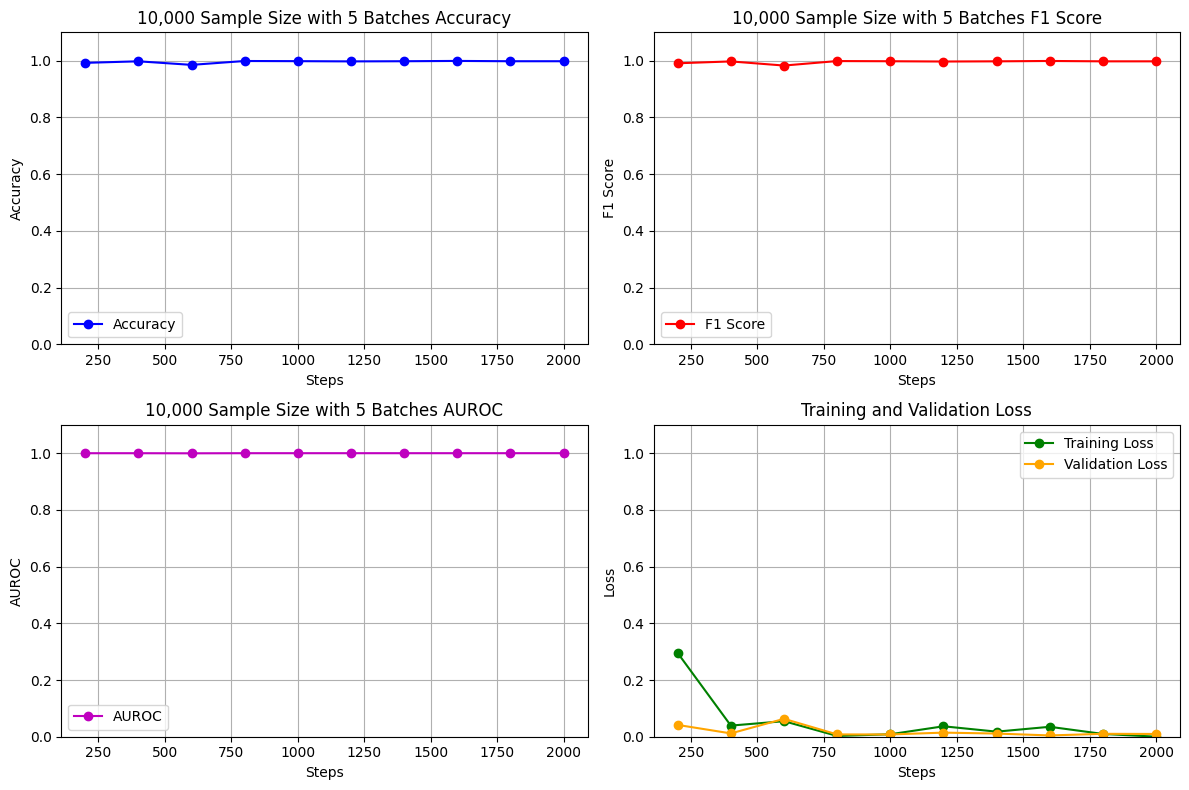

In [113]:
import matplotlib.pyplot as plt

# Provided data
steps = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
training_loss = [0.295200, 0.039200, 0.054800, 0.002700, 0.008700, 0.036800, 0.017900, 0.035000, 0.009800, 0.000200]
validation_loss = [0.041633, 0.011711, 0.063095, 0.008109, 0.007986, 0.014478, 0.011132, 0.004520, 0.010224, 0.009765]
accuracy = [0.992343, 0.997812, 0.985234, 0.998906, 0.998359, 0.997539, 0.998086, 0.999180, 0.998086, 0.998086]
precision = [0.999344, 0.997419, 0.967500, 0.998067, 0.998065, 1.000000, 1.000000, 0.998068, 0.997421, 0.997421]
f1 = [0.990891, 0.997419, 0.982857, 0.998711, 0.998065, 0.997088, 0.997737, 0.999033, 0.997743, 0.997743]
auroc = [0.999911, 0.999931, 0.999584, 0.999993, 0.999990, 0.999992, 0.999996, 0.999995, 0.999991, 0.999990]

# Plot Accuracy
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(steps, accuracy, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('10,000 Sample Size with 5 Batches Accuracy')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0, 1.1)
plt.grid(True)

# Plot F1 Score
plt.subplot(2, 2, 2)
plt.plot(steps, f1, marker='o', linestyle='-', color='r', label='F1 Score')
plt.title('10,000 Sample Size with 5 Batches F1 Score')
plt.xlabel('Steps')
plt.ylabel('F1 Score')
plt.legend()
plt.ylim(0, 1.1)
plt.grid(True)

# Plot AUROC
plt.subplot(2, 2, 3)
plt.plot(steps, auroc, marker='o', linestyle='-', color='m', label='AUROC')
plt.title('10,000 Sample Size with 5 Batches AUROC')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.legend()
plt.ylim(0, 1.1)
plt.grid(True)

# Plot Training and Validation Loss
plt.subplot(2, 2, 4)
plt.plot(steps, training_loss, marker='o', linestyle='-', color='g', label='Training Loss')
plt.plot(steps, validation_loss, marker='o', linestyle='-', color='orange', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0, 1.1)
plt.grid(True)

plt.tight_layout()
plt.show()
